In [1]:
# Load libraries
import numpy as np
from numpy import array
import csv
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError, MeanSquaredError
from tensorflow.keras.models import Sequential
pd.set_option("display.max_columns", None)

Load original dataset

In [2]:
df = pd.read_csv('https://nft-capstone.s3.us-west-1.amazonaws.com/Data_API.csv.gz')
df['Datetime_updated'] = pd.to_datetime(df['Datetime_updated'])
df['Datetime_updated_seconds'] = pd.to_datetime(df['Datetime_updated_seconds'])
df = df.sort_values(by="Datetime_updated_seconds")

/home/ubuntu/anaconda3/envs/tensorflow_p37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['index'] = np.arange(len(df))
df.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
242722,NaN,1001.0,0x5c8a04e3174fed51f8cbe8f8ec77b6d5714343c3ebc6...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x672ec49f7f7eac25c3a2e651f67f579bb5da8936,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009922,ETH,3.970675,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1001')",Cryptokittie,Art,0
242721,NaN,1002.0,0x468168419be7e442d5ff32d264fab24087b744bc2e37...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x316c55d1895a085c4b39a98ecb563f509301aaf7,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009751,ETH,3.902311,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1002')",Cryptokittie,Art,1
242720,NaN,1003.0,0xc9812b823ddd7b32184525598aafeae78e3b4544a471...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x730fafe1108f507b454b6eb59f0eec1f1ba31935,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009817,ETH,3.928712,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1003')",Cryptokittie,Art,2
242719,NaN,1004.0,0xa218fc480601f5810b51138ce92365deb00e9e0107d1...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x3849082eff243a825a82baea2a7c6f20a1134fd0,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009751,ETH,3.902311,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1004')",Cryptokittie,Art,3
242718,NaN,1005.0,0x4aac006449d46587bafd2836cfb221be3588137c4022...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x30ad9c33809f33b599f1b9e6b69958e1c22b3ae0,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009567,ETH,3.828667,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1005')",Cryptokittie,Art,4


Group NFTS into collections

In [4]:
# group nfts collection transactions
summary_data_col = df.groupby('Collection_cleaned').count()
summary_data_col[['index']]

,index
Collection_cleaned,
Aaronsartistry,57
Aasgard,10
Aavegotchi,2388
Abacu,142
Abeautifulthingawaitsusall,2
...,...
Zuphy,3
Zuzumazu,2
Zweihspacert,1


In [5]:
rep_nft_col = summary_data_col[summary_data_col['index'] > 20000]

nft_list_col = rep_nft_col.index.to_list()
# subset main df to nfts with high resale transaction counts
nft_col_df = df[df['Collection_cleaned'].isin(nft_list_col)]
nft_col_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
242722,NaN,1001.0,0x5c8a04e3174fed51f8cbe8f8ec77b6d5714343c3ebc6...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x672ec49f7f7eac25c3a2e651f67f579bb5da8936,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009922,ETH,3.970675,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1001')",Cryptokittie,Art,0
242721,NaN,1002.0,0x468168419be7e442d5ff32d264fab24087b744bc2e37...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x316c55d1895a085c4b39a98ecb563f509301aaf7,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009751,ETH,3.902311,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1002')",Cryptokittie,Art,1
242720,NaN,1003.0,0xc9812b823ddd7b32184525598aafeae78e3b4544a471...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x730fafe1108f507b454b6eb59f0eec1f1ba31935,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009817,ETH,3.928712,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1003')",Cryptokittie,Art,2
242719,NaN,1004.0,0xa218fc480601f5810b51138ce92365deb00e9e0107d1...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x3849082eff243a825a82baea2a7c6f20a1134fd0,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009751,ETH,3.902311,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1004')",Cryptokittie,Art,3
242718,NaN,1005.0,0x4aac006449d46587bafd2836cfb221be3588137c4022...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x30ad9c33809f33b599f1b9e6b69958e1c22b3ae0,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009567,ETH,3.828667,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1005')",Cryptokittie,Art,4
242717,NaN,1006.0,0xfb7d991c9dc8fcdd48b88d8c50069f51a082ebc27dab...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x77efe0036a742b8c3f31fa87dc28e277f3c21d4b,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009524,ETH,3.811437,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1006')",Cryptokittie,Art,5
242716,NaN,1007.0,0x13775391b71db26adf27202853b7bdccc1dfc75ef27b...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x0b8546f4d2f324aba30168dc8acf113c301d3cfe,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009751,ETH,3.902311,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1007')",Cryptokittie,Art,6
242715,NaN,1008.0,0x621c58ab6adc225f021cc66cc94003c4cf921f277375...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x76df4c63c28d462d5064add17f51e2ad55c9d5a2,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009891,ETH,3.958169,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1008')",Cryptokittie,Art,7
242714,NaN,1009.0,0x55350380f679b0ee3f44bb4beff9a9f2394fb0dd7433...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x0b8546f4d2f324aba30168dc8acf113c301d3cfe,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009751,ETH,3.902311,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1009')",Cryptokittie,Art,8
242713,NaN,1010.0,0x91aa1c526e5a9e8dc3cf1de12d8e23e681e985fa36ad...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x40dbf0a418f63e45afcd4e839e3582d1f6dc476e,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009743,ETH,3.898976,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1010')",Cryptokittie,Art,9


In [6]:
sum_col_data_new = nft_col_df.groupby('Collection_cleaned').count()
sum_col_data_new[['index']]

,index
Collection_cleaned,
Alien,1290146
Atari,26491
Axie,171278
Bitcoin,26251
Bitverse,25019
Cartombs.r,64986
Cryptokittie,1092177
Cryptospace,20064
Dark,27186


In [7]:
kitties = df[df['Collection_cleaned'] == "Cryptokittie"]

Now we have a cryptokitties dataset, try LSTM on that

In [8]:
len(kitties)

1092177

In [9]:
kitties.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
242722,NaN,1001.0,0x5c8a04e3174fed51f8cbe8f8ec77b6d5714343c3ebc6...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x672ec49f7f7eac25c3a2e651f67f579bb5da8936,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009922,ETH,3.970675,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1001')",Cryptokittie,Art,0
242721,NaN,1002.0,0x468168419be7e442d5ff32d264fab24087b744bc2e37...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x316c55d1895a085c4b39a98ecb563f509301aaf7,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009751,ETH,3.902311,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1002')",Cryptokittie,Art,1
242720,NaN,1003.0,0xc9812b823ddd7b32184525598aafeae78e3b4544a471...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x730fafe1108f507b454b6eb59f0eec1f1ba31935,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009817,ETH,3.928712,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1003')",Cryptokittie,Art,2
242719,NaN,1004.0,0xa218fc480601f5810b51138ce92365deb00e9e0107d1...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x3849082eff243a825a82baea2a7c6f20a1134fd0,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009751,ETH,3.902311,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1004')",Cryptokittie,Art,3
242718,NaN,1005.0,0x4aac006449d46587bafd2836cfb221be3588137c4022...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x30ad9c33809f33b599f1b9e6b69958e1c22b3ae0,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,NaN,0.009567,ETH,3.828667,NaN,NaN,Cryptokitties,Cryptokitties,2017-11-23,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1005')",Cryptokittie,Art,4


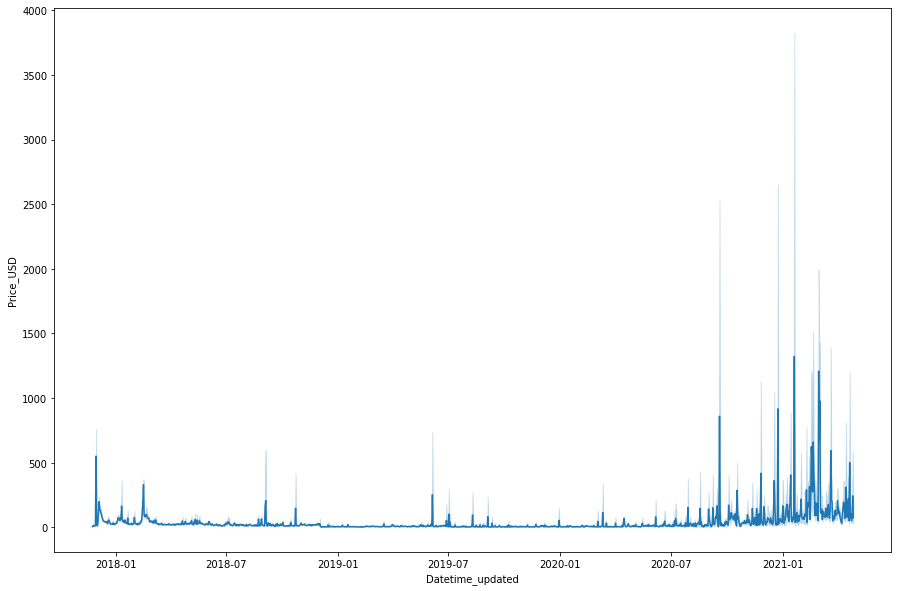

In [10]:
plt.figure(figsize=(15,10))
sns.lineplot(data=kitties, x="Datetime_updated", y="Price_USD")

In [11]:
kitties['Datetime_updated'] = pd.to_datetime(kitties['Datetime_updated'])
kitties = kitties.sort_values(by="Datetime_updated")
sum_kitties = kitties.groupby(pd.Grouper(key='Datetime_updated', axis=0)).mean()
sum_kitties[['Price_USD']]


/home/ubuntu/anaconda3/envs/tensorflow_p37/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Price_USD
Datetime_updated,
2017-11-23,5.017132
2017-11-24,10.117630
2017-11-25,15.167205
2017-11-26,10.671264
2017-11-27,10.028943
...,...
2021-04-23,103.947317
2021-04-24,50.838357
2021-04-25,74.179980


<h3>Start modeling with univariate time series of 1 collection</h3>

In [89]:
train_data, test_data = sum_kitties[0:int(len(sum_kitties)*0.7)], sum_kitties[int(len(sum_kitties)*0.7):]

In [90]:
train_data

,Price_Crypto,Price_USD,index
Datetime_updated,,,
2017-11-23,0.012246,5.017132,2.435000e+02
2017-11-24,0.022625,10.117630,7.040000e+02
2017-11-25,0.032884,15.167205,1.114500e+03
2017-11-26,0.021829,10.671264,1.380000e+03
2017-11-27,0.021807,10.028943,1.534000e+03
...,...,...,...
2020-04-12,0.053654,15.164899,1.856077e+06
2020-04-13,0.017003,3.860266,1.858780e+06
2020-04-14,0.065594,35.216059,1.861771e+06


In [91]:
train_data['Price_USD'].tolist()

[5.017132036831518,
 10.117629510015057,
 15.167205078844956,
 10.67126367576675,
 10.028943391588847,
 15.237671895567864,
 549.9760066044781,
 13.279197264960533,
 12.227575071665216,
 33.6878213771868,
 124.30853818006304,
 197.58762632306656,
 137.93310757758246,
 129.26503990841937,
 113.15346356834473,
 95.56119460403494,
 72.83616576012592,
 60.860892832329014,
 48.15840494869582,
 46.328231808668164,
 43.96850657029915,
 44.106468678307,
 38.52773190407617,
 42.33960834565251,
 35.524748016447475,
 27.638005395728538,
 55.27793983253865,
 53.2794500254443,
 41.21070148141404,
 33.00730435067122,
 24.29833153426745,
 24.769301850617126,
 25.755387850885292,
 22.75431388159361,
 34.01462299391356,
 22.283243882365397,
 24.94159272969682,
 22.20319458229891,
 28.36000588577146,
 30.78447494576644,
 40.37580908171665,
 42.5319602775119,
 73.65362610546826,
 69.84088420897592,
 69.43225770836547,
 51.66544629469514,
 70.86694893438248,
 60.9611806920022,
 163.86767679954684,
 63.732

In [92]:
n_features = 1
n_steps = 10

In [93]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# choose a number of time steps
# split into samples
X_train, y_train = split_sequence(train_data['Price_USD'].tolist(), n_steps)
X_test, y_test = split_sequence(test_data['Price_USD'].tolist(), n_steps)
# summarize the data
#for i in range(len(X)):
    #print(X[i], y[i])

In [94]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [95]:
X_train

array([[[  5.01713204],
        [ 10.11762951],
        [ 15.16720508],
        ...,
        [ 13.27919726],
        [ 12.22757507],
        [ 33.68782138]],

       [[ 10.11762951],
        [ 15.16720508],
        [ 10.67126368],
        ...,
        [ 12.22757507],
        [ 33.68782138],
        [124.30853818]],

       [[ 15.16720508],
        [ 10.67126368],
        [ 10.02894339],
        ...,
        [ 33.68782138],
        [124.30853818],
        [197.58762632]],

       ...,

       [[  6.35827809],
        [  5.90105464],
        [  5.26029686],
        ...,
        [  4.18689184],
        [ 15.16489875],
        [  3.86026632]],

       [[  5.90105464],
        [  5.26029686],
        [  4.38921694],
        ...,
        [ 15.16489875],
        [  3.86026632],
        [ 35.21605891]],

       [[  5.26029686],
        [  4.38921694],
        [  4.69685471],
        ...,
        [  3.86026632],
        [ 35.21605891],
        [ 68.72869687]]])

In [96]:
y_train

array([124.30853818, 197.58762632, 137.93310758, 129.26503991,
       113.15346357,  95.5611946 ,  72.83616576,  60.86089283,
        48.15840495,  46.32823181,  43.96850657,  44.10646868,
        38.5277319 ,  42.33960835,  35.52474802,  27.6380054 ,
        55.27793983,  53.27945003,  41.21070148,  33.00730435,
        24.29833153,  24.76930185,  25.75538785,  22.75431388,
        34.01462299,  22.28324388,  24.94159273,  22.20319458,
        28.36000589,  30.78447495,  40.37580908,  42.53196028,
        73.65362611,  69.84088421,  69.43225771,  51.66544629,
        70.86694893,  60.96118069, 163.8676768 ,  63.73277563,
        45.15707123,  47.50669435,  37.29428491,  56.39768572,
        46.92753413,  33.03730372,  35.57856097,  27.95282791,
        71.93389277,  23.64952025,  27.54450871,  22.97731095,
        23.66633386,  24.26284684,  31.5370684 ,  20.91152219,
        23.88583086,  24.41332805,  34.52154566,  76.21232001,
        37.50692435,  26.36185221,  25.87440311,  28.09

In [97]:
def get_model(params, n_steps, n_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(loss=params["loss"],
                  optimizer=params["optimizer"],
                  metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanSquaredError()])

    return model

In [98]:
params = {
    "loss": "mean_squared_error",
    "optimizer": "adam",
    "dropout": 0.2,
    "lstm_units": 90,
    "epochs": 100,
    "batch_size": 64,
    "es_patience" : 30
}

model = get_model(params, n_steps, n_features)

In [99]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

In [100]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=params["epochs"],
    batch_size=params["batch_size"],
    verbose=1,
    callbacks=[]
)

Train on 866 samples, validate on 366 samples
Epoch 1/100
866/866 [==============================] - 3s 3ms/sample - loss: 1047.7840 - root_mean_squared_error: 32.3695 - mean_absolute_error: 18.2537 - mean_squared_error: 1047.7839 - val_loss: 25449.8438 - val_root_mean_squared_error: 159.5301 - val_mean_absolute_error: 69.0421 - val_mean_squared_error: 25449.8438
Epoch 2/100
866/866 [==============================] - 1s 691us/sample - loss: 635.4765 - root_mean_squared_error: 25.2087 - mean_absolute_error: 11.4919 - mean_squared_error: 635.4765 - val_loss: 22934.4011 - val_root_mean_squared_error: 151.4411 - val_mean_absolute_error: 66.8173 - val_mean_squared_error: 22934.3984
Epoch 3/100
866/866 [==============================] - 1s 736us/sample - loss: 481.9644 - root_mean_squared_error: 21.9537 - mean_absolute_error: 9.2928 - mean_squared_error: 481.9644 - val_loss: 20190.0833 - val_root_mean_squared_error: 142.0918 - val_mean_absolute_error: 57.5595 - val_mean_squared_error: 20190.

Epoch 52/100
866/866 [==============================] - 1s 708us/sample - loss: 238.2666 - root_mean_squared_error: 15.4359 - mean_absolute_error: 6.8802 - mean_squared_error: 238.2666 - val_loss: 20203.3721 - val_root_mean_squared_error: 142.1386 - val_mean_absolute_error: 57.6393 - val_mean_squared_error: 20203.3730
Epoch 53/100
866/866 [==============================] - 1s 679us/sample - loss: 287.7862 - root_mean_squared_error: 16.9643 - mean_absolute_error: 7.7766 - mean_squared_error: 287.7862 - val_loss: 20127.7944 - val_root_mean_squared_error: 141.8725 - val_mean_absolute_error: 60.6403 - val_mean_squared_error: 20127.7930
Epoch 54/100
866/866 [==============================] - 1s 587us/sample - loss: 331.2106 - root_mean_squared_error: 18.1992 - mean_absolute_error: 8.3458 - mean_squared_error: 331.2105 - val_loss: 20475.8934 - val_root_mean_squared_error: 143.0940 - val_mean_absolute_error: 59.1544 - val_mean_squared_error: 20475.8926
Epoch 55/100
866/866 [==================

Epoch 78/100
866/866 [==============================] - 1s 667us/sample - loss: 187.9586 - root_mean_squared_error: 13.7098 - mean_absolute_error: 6.7003 - mean_squared_error: 187.9586 - val_loss: 21289.8302 - val_root_mean_squared_error: 145.9104 - val_mean_absolute_error: 58.8527 - val_mean_squared_error: 21289.8320
Epoch 79/100
866/866 [==============================] - 1s 641us/sample - loss: 225.0014 - root_mean_squared_error: 15.0000 - mean_absolute_error: 6.8724 - mean_squared_error: 225.0014 - val_loss: 21085.9406 - val_root_mean_squared_error: 145.2100 - val_mean_absolute_error: 59.1883 - val_mean_squared_error: 21085.9395
Epoch 80/100
866/866 [==============================] - 1s 672us/sample - loss: 213.2966 - root_mean_squared_error: 14.6047 - mean_absolute_error: 7.0021 - mean_squared_error: 213.2966 - val_loss: 21001.2081 - val_root_mean_squared_error: 144.9179 - val_mean_absolute_error: 58.6129 - val_mean_squared_error: 21001.2070
Epoch 81/100
866/866 [==================

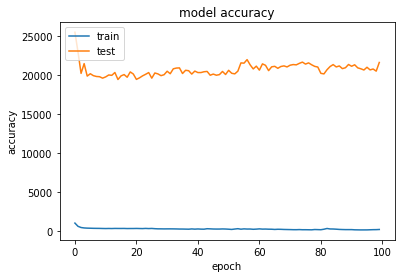

In [101]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Perform the same for godsunchained</h2>

In [63]:
gods = df[df['Collection_cleaned'] == "Godsunchained"]
gods = gods.sort_values(by="Datetime_updated_seconds")
sum_gods = gods.groupby(pd.Grouper(key='Datetime_updated', axis=0)).mean()

In [64]:
train_data, test_data = sum_gods[0:int(len(sum_gods)*0.7)], sum_gods[int(len(sum_gods)*0.7):]

In [65]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

X_train, y_train = split_sequence(train_data['Price_USD'].tolist(), n_steps)
X_test, y_test = split_sequence(test_data['Price_USD'].tolist(), n_steps)

In [66]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [67]:
params = {
    "loss": "mean_squared_error",
    "optimizer": "adam",
    "dropout": 0.2,
    "lstm_units": 90,
    "epochs": 100,
    "batch_size": 64,
    "es_patience" : 30
}

model = get_model(params, n_steps, n_features)

In [68]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=params["epochs"],
    batch_size=params["batch_size"],
    verbose=1,
    callbacks=[]
)

Train on 428 samples, validate on 179 samples
Epoch 1/100
428/428 [==============================] - 2s 5ms/sample - loss: 11527.1874 - root_mean_squared_error: 107.3647 - mean_absolute_error: 25.5217 - mean_squared_error: 11527.1885 - val_loss: 4383411.2650 - val_root_mean_squared_error: 2093.6597 - val_mean_absolute_error: 371.0139 - val_mean_squared_error: 4383411.0000
Epoch 2/100
428/428 [==============================] - 0s 716us/sample - loss: 11164.8535 - root_mean_squared_error: 105.6639 - mean_absolute_error: 24.1796 - mean_squared_error: 11164.8525 - val_loss: 4377759.8184 - val_root_mean_squared_error: 2092.3098 - val_mean_absolute_error: 360.7303 - val_mean_squared_error: 4377760.0000
Epoch 3/100
428/428 [==============================] - 0s 663us/sample - loss: 11283.5109 - root_mean_squared_error: 106.2239 - mean_absolute_error: 23.9532 - mean_squared_error: 11283.5107 - val_loss: 4417709.2689 - val_root_mean_squared_error: 2101.8347 - val_mean_absolute_error: 355.3309 - 

Epoch 26/100
428/428 [==============================] - 0s 775us/sample - loss: 7772.2500 - root_mean_squared_error: 88.1604 - mean_absolute_error: 26.2046 - mean_squared_error: 7772.2500 - val_loss: 6139114.0447 - val_root_mean_squared_error: 2477.7236 - val_mean_absolute_error: 570.6962 - val_mean_squared_error: 6139114.0000
Epoch 27/100
428/428 [==============================] - 0s 623us/sample - loss: 7299.1560 - root_mean_squared_error: 85.4351 - mean_absolute_error: 23.2409 - mean_squared_error: 7299.1558 - val_loss: 5474863.8161 - val_root_mean_squared_error: 2339.8425 - val_mean_absolute_error: 508.7180 - val_mean_squared_error: 5474863.5000
Epoch 28/100
428/428 [==============================] - 0s 705us/sample - loss: 7557.4058 - root_mean_squared_error: 86.9333 - mean_absolute_error: 22.8494 - mean_squared_error: 7557.4053 - val_loss: 5229016.9920 - val_root_mean_squared_error: 2286.7043 - val_mean_absolute_error: 489.5351 - val_mean_squared_error: 5229017.0000
Epoch 29/100


Epoch 51/100
428/428 [==============================] - 0s 641us/sample - loss: 9144.0026 - root_mean_squared_error: 95.6243 - mean_absolute_error: 21.6597 - mean_squared_error: 9144.0020 - val_loss: 4841810.0468 - val_root_mean_squared_error: 2200.4114 - val_mean_absolute_error: 509.7592 - val_mean_squared_error: 4841810.0000
Epoch 52/100
428/428 [==============================] - 0s 692us/sample - loss: 9840.3310 - root_mean_squared_error: 99.1984 - mean_absolute_error: 22.8269 - mean_squared_error: 9840.3311 - val_loss: 3928244.1830 - val_root_mean_squared_error: 1981.9799 - val_mean_absolute_error: 462.4106 - val_mean_squared_error: 3928244.2500
Epoch 53/100
428/428 [==============================] - 0s 738us/sample - loss: 8399.1511 - root_mean_squared_error: 91.6469 - mean_absolute_error: 25.7479 - mean_squared_error: 8399.1504 - val_loss: 4303162.0747 - val_root_mean_squared_error: 2074.4065 - val_mean_absolute_error: 469.4955 - val_mean_squared_error: 4303162.0000
Epoch 54/100


Epoch 76/100
428/428 [==============================] - 0s 658us/sample - loss: 8451.8019 - root_mean_squared_error: 91.9337 - mean_absolute_error: 21.5352 - mean_squared_error: 8451.8018 - val_loss: 5460111.3408 - val_root_mean_squared_error: 2336.6880 - val_mean_absolute_error: 560.3288 - val_mean_squared_error: 5460111.0000
Epoch 77/100
428/428 [==============================] - 0s 693us/sample - loss: 7409.8830 - root_mean_squared_error: 86.0807 - mean_absolute_error: 20.0290 - mean_squared_error: 7409.8833 - val_loss: 6108910.1676 - val_root_mean_squared_error: 2471.6208 - val_mean_absolute_error: 577.6918 - val_mean_squared_error: 6108910.0000
Epoch 78/100
428/428 [==============================] - 0s 699us/sample - loss: 7928.8139 - root_mean_squared_error: 89.0439 - mean_absolute_error: 20.9297 - mean_squared_error: 7928.8135 - val_loss: 6061735.8827 - val_root_mean_squared_error: 2462.0593 - val_mean_absolute_error: 588.6458 - val_mean_squared_error: 6061736.0000
Epoch 79/100


<h2>Try all</h2>

In [102]:
df_all = df
df_all = df_all.sort_values(by="Datetime_updated_seconds")
sum_df_all = df_all.groupby(pd.Grouper(key='Datetime_updated', axis=0)).mean()

In [103]:
train_data, test_data = sum_df_all[0:int(len(sum_df_all)*0.7)], sum_df_all[int(len(sum_df_all)*0.7):]

In [104]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

X_train, y_train = split_sequence(train_data['Price_USD'].tolist(), n_steps)
X_test, y_test = split_sequence(test_data['Price_USD'].tolist(), n_steps)

In [105]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [106]:
params = {
    "loss": "mean_squared_error",
    "optimizer": "adam",
    "dropout": 0.2,
    "lstm_units": 90,
    "epochs": 100,
    "batch_size": 64,
    "es_patience" : 30
}

model = get_model(params, n_steps, n_features)

In [107]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=params["epochs"],
    batch_size=params["batch_size"],
    verbose=1,
    callbacks=[]
)

Train on 866 samples, validate on 366 samples
Epoch 1/100
866/866 [==============================] - 3s 3ms/sample - loss: 2223.0742 - root_mean_squared_error: 47.1495 - mean_absolute_error: 28.5301 - mean_squared_error: 2223.0742 - val_loss: 21936.5382 - val_root_mean_squared_error: 148.1099 - val_mean_absolute_error: 81.9916 - val_mean_squared_error: 21936.5391
Epoch 2/100
866/866 [==============================] - 1s 688us/sample - loss: 1455.4542 - root_mean_squared_error: 38.1504 - mean_absolute_error: 19.3207 - mean_squared_error: 1455.4541 - val_loss: 18409.4889 - val_root_mean_squared_error: 135.6816 - val_mean_absolute_error: 78.4425 - val_mean_squared_error: 18409.4883
Epoch 3/100
866/866 [==============================] - 1s 664us/sample - loss: 1355.8325 - root_mean_squared_error: 36.8216 - mean_absolute_error: 19.2120 - mean_squared_error: 1355.8325 - val_loss: 20006.2254 - val_root_mean_squared_error: 141.4434 - val_mean_absolute_error: 81.0727 - val_mean_squared_error: 2

866/866 [==============================] - 1s 617us/sample - loss: 969.7101 - root_mean_squared_error: 31.1402 - mean_absolute_error: 17.3360 - mean_squared_error: 969.7101 - val_loss: 22343.4053 - val_root_mean_squared_error: 149.4771 - val_mean_absolute_error: 85.1698 - val_mean_squared_error: 22343.4062
Epoch 52/100
866/866 [==============================] - 1s 658us/sample - loss: 965.8566 - root_mean_squared_error: 31.0782 - mean_absolute_error: 17.3536 - mean_squared_error: 965.8566 - val_loss: 21542.6365 - val_root_mean_squared_error: 146.7741 - val_mean_absolute_error: 85.0186 - val_mean_squared_error: 21542.6367
Epoch 53/100
866/866 [==============================] - 1s 644us/sample - loss: 1097.5594 - root_mean_squared_error: 33.1294 - mean_absolute_error: 17.8985 - mean_squared_error: 1097.5594 - val_loss: 20155.2245 - val_root_mean_squared_error: 141.9691 - val_mean_absolute_error: 83.9648 - val_mean_squared_error: 20155.2246
Epoch 54/100
866/866 [==========================

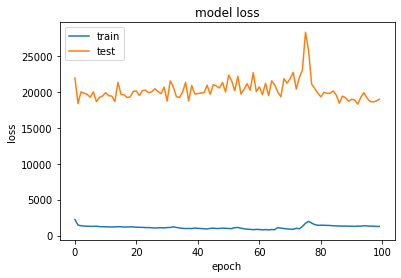

In [108]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Try multivariate</h2>

In [13]:
df_multivariate = df.groupby([pd.Grouper(key='Datetime_updated', axis=0), 'Collection_cleaned']).mean()
df_multivariate = df_multivariate.reset_index()
df_multivariate

,Datetime_updated,Collection_cleaned,Price_Crypto,Price_USD,index
0,2017-11-23,Cryptokittie,0.012246,5.017132,2.435000e+02
1,2017-11-24,Cryptokittie,0.022625,10.117630,7.040000e+02
2,2017-11-25,Cryptokittie,0.032884,15.167205,1.114500e+03
3,2017-11-26,Cryptokittie,0.021829,10.671264,1.380000e+03
4,2017-11-27,Cryptokittie,0.021807,10.028943,1.534000e+03
...,...,...,...,...,...
83012,2021-04-27,Xcopy,0.952333,2417.902374,5.979452e+06
83013,2021-04-27,Xmonsxyz,1.250000,3157.926567,5.988644e+06
83014,2021-04-27,Yorhghnes,0.875000,0.174838,5.940646e+06
83015,2021-04-27,Zanygumball,0.032789,0.006439,6.003463e+06


In [76]:
train_data, test_data = df_multivariate[0:int(len(df_multivariate)*0.7)], df_multivariate[int(len(df_multivariate)*0.7):]

In [31]:
# multivariate data preparation
from numpy import array
from numpy import hstack
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
in_seq1 = array(df_multivariate['Price_USD'].to_list())
in_seq2 = array(df_multivariate['Price_Crypto'].to_list())
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


In [ ]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

| Model      |NFT Type| Dataset | Features |MSE |
| ----------- | ----------- | ---------|--|---|
| Vanilla LSTM |Collection| Cryptokitties | Price_USD | 19356.5762|
| Vanilla LSTM |Collection| Godsunchained | Price_USD | 4653950.000|
| Vanilla LSTM |Whole Data Set| All | Price_USD | 21300.1758 |
|Vanilla LSTM | Whole Data Set | All | Price_USD, Price_Crypto, Crypto |20154.67 |

<h2>Try multivariate - classification vs price prediction</h2>

In [29]:
df_multivariate = df.groupby([pd.Grouper(key='Datetime_updated', axis=0), 'Collection_cleaned']).mean()
df_multivariate = df_multivariate.reset_index()
df_multivariate

,Datetime_updated,Collection_cleaned,Price_Crypto,Price_USD,index
0,2017-11-23,Cryptokittie,0.012246,5.017132,2.435000e+02
1,2017-11-24,Cryptokittie,0.022625,10.117630,7.040000e+02
2,2017-11-25,Cryptokittie,0.032884,15.167205,1.114500e+03
3,2017-11-26,Cryptokittie,0.021829,10.671264,1.380000e+03
4,2017-11-27,Cryptokittie,0.021807,10.028943,1.534000e+03
...,...,...,...,...,...
83012,2021-04-27,Xcopy,0.952333,2417.902374,5.979452e+06
83013,2021-04-27,Xmonsxyz,1.250000,3157.926567,5.988644e+06
83014,2021-04-27,Yorhghnes,0.875000,0.174838,5.940646e+06
83015,2021-04-27,Zanygumball,0.032789,0.006439,6.003463e+06


In [34]:
def calc_difference(collection_cleaned, price_usd, collection_cleaned_shift, price_usd_shift):
    if pd.isna(collection_cleaned_shift) or pd.isna(price_usd_shift) or (collection_cleaned != collection_cleaned_shift):
        return np.nan
    else:
        if price_usd > price_usd_shift:
            return 1
        elif price_usd < price_usd_shift:
            return -1
        else:
            return 0

In [41]:
df_multivariate_grouped = df_multivariate.sort_values(by=['Collection_cleaned', 'Datetime_updated'])
df_multivariate_grouped['Price_USD_shift'] = df_multivariate_grouped['Price_USD'].shift(1)
df_multivariate_grouped['Collection_cleaned_shift'] = df_multivariate_grouped['Collection_cleaned'].shift(1)
df_multivariate_grouped['Price_change'] = df_multivariate_grouped.apply(lambda row: calc_difference
                                                                        (row['Collection_cleaned'],
                                                                        row['Price_USD'],
                                                                        row['Collection_cleaned_shift'],
                                                                       row['Price_USD_shift']), axis = 1)
df_multivariate_grouped

,Datetime_updated,Collection_cleaned,Price_Crypto,Price_USD,index,Price_USD_shift,Collection_cleaned_shift,Price_change
43459,2021-01-27,Aaronsartistry,0.03,38.73240,2.861674e+06,NaN,NaN,NaN
47108,2021-02-16,Aaronsartistry,0.03,53.28840,3.056216e+06,38.73240,Aaronsartistry,1.0
50155,2021-02-26,Aaronsartistry,0.06,88.90920,3.317138e+06,53.28840,Aaronsartistry,1.0
53447,2021-03-05,Aaronsartistry,0.04,59.85660,3.455659e+06,88.90920,Aaronsartistry,-1.0
53977,2021-03-06,Aaronsartistry,0.03,47.77590,3.499525e+06,59.85660,Aaronsartistry,-1.0
...,...,...,...,...,...,...,...,...
44645,2021-02-02,Zyzzyvasalgorithmicart,0.02,29.11040,2.904417e+06,25.81840,Zyzzyvasalgorithmicart,1.0
53446,2021-03-04,Zyzzyvasalgorithmicart,0.05,78.26575,3.448273e+06,29.11040,Zyzzyvasalgorithmicart,1.0
56789,2021-03-10,Zyzzyvasalgorithmicart,0.05,90.91750,3.591764e+06,78.26575,Zyzzyvasalgorithmicart,1.0
51929,2021-03-01,Zzsun,0.30,447.93000,3.382078e+06,90.91750,Zyzzyvasalgorithmicart,NaN


In [18]:
df_multivariate

,Datetime_updated,Collection_cleaned,Price_Crypto,Price_USD,index,Previous_Price_USD
0,2017-11-23,Cryptokittie,0.012246,5.017132,2.435000e+02,NaN
1,2017-11-24,Cryptokittie,0.022625,10.117630,7.040000e+02,NaN
2,2017-11-25,Cryptokittie,0.032884,15.167205,1.114500e+03,NaN
3,2017-11-26,Cryptokittie,0.021829,10.671264,1.380000e+03,NaN
4,2017-11-27,Cryptokittie,0.021807,10.028943,1.534000e+03,NaN
...,...,...,...,...,...,...
83012,2021-04-27,Xcopy,0.952333,2417.902374,5.979452e+06,NaN
83013,2021-04-27,Xmonsxyz,1.250000,3157.926567,5.988644e+06,NaN
83014,2021-04-27,Yorhghnes,0.875000,0.174838,5.940646e+06,NaN
83015,2021-04-27,Zanygumball,0.032789,0.006439,6.003463e+06,NaN
